In [1]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

In [32]:
df = pd.read_csv('cell_coverage_map2_postgres.csv')
df.head()

,capture_timestamp,read_timestamp,delta_time,tsp_provider,vin,latitude,longitude,geom,gid
0,1/13/2020 0:24,20:42.4,55:44.4,geotab,4V4NC9TH7KN205540,38.758068,-111.410919,0101000020E61000008693347F4CDA5BC008D220600861...,144764
1,1/13/2020 2:11,09:42.0,58:12.0,geotab,1HTMMMML5JH418853,34.027214,-118.172470,0101000020E6100000A2629CBF098B5DC0BBBE6AC07B03...,145651
2,1/13/2020 9:46,36:42.6,1 day 08:49:50.619,geotab,3HAMMMML2KL383619,40.663013,-73.783142,0101000020E6100000BBE70A001F7252C03BA759A0DD54...,145672
3,49:28.6,12:43.4,23:14.7,geotab,1HTMMMMN2JH543276,30.389582,-91.085693,0101000020E6100000EA9E2B007CC556C0BE9E54A0BB63...,146712
4,1/13/2020 11:30,37:14.6,06:16.6,geotab,3AKJGEDRXHDHW9173,46.783386,-70.234291,0101000020E61000009B0F19A0FE8E51C0A191BEFF4564...,146729


In [33]:
df.drop(['capture_timestamp', 'read_timestamp', 'delta_time', 'tsp_provider', 'vin', 'geom'],axis = 1, inplace = True)
df.head()

,latitude,longitude,gid
0,38.758068,-111.410919,144764
1,34.027214,-118.172470,145651
2,40.663013,-73.783142,145672
3,30.389582,-91.085693,146712
4,46.783386,-70.234291,146729


In [34]:
df['gid'].value_counts()

264191    1
230746    1
152928    1
240991    1
238942    1
         ..
191112    1
189065    1
195210    1
193163    1
262144    1
Name: gid, Length: 144755, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000213DE424F60>]],
      dtype=object)

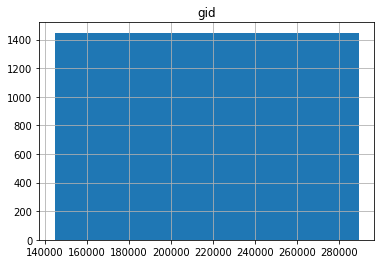

In [40]:
df.hist(column='gid', bins=100)

In [41]:
df.columns

Index(['latitude', 'longitude', 'gid'], dtype='object')

In [42]:
X = df[['latitude', 'longitude', 'gid']] .values #astype(float)
X[0:5]

array([[ 3.87580681e+01, -1.11410919e+02,  1.44764000e+05],
       [ 3.40272141e+01, -1.18172470e+02,  1.45651000e+05],
       [ 4.06630135e+01, -7.37831421e+01,  1.45672000e+05],
       [ 3.03895817e+01, -9.10856934e+01,  1.46712000e+05],
       [ 4.67833862e+01, -7.02342911e+01,  1.46729000e+05]])

In [43]:
y = df['gid'].values
y[0:5]

array([144764, 145651, 145672, 146712, 146729], dtype=int64)

In [44]:
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:5]

array([[ 0.03288422, -1.01655745, -1.7318474 ],
       [-0.86041102, -1.40236098, -1.71062078],
       [ 0.39258221,  1.13042466, -1.71011824],
       [-1.5472806 ,  0.14316814, -1.68523022],
       [ 1.54825089,  1.33291655, -1.68482339]])

In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (115804, 3) (115804,)
Test set: (28951, 3) (28951,)


In [46]:
from sklearn.neighbors import KNeighborsClassifier

In [47]:
k = 4
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')

In [48]:
yhat = neigh.predict(X_test)
yhat[0:5]

array([178735, 277974, 215508, 209841, 239440], dtype=int64)

In [49]:
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.12848433560153363
Test set Accuracy:  0.0


In [50]:
# write your code here
k = 6
neigh6 = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
yhat6 = neigh6.predict(X_test)
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh6.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat6))

Train set Accuracy:  0.034420227280577524
Test set Accuracy:  0.0


In [51]:
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0., 0., 0., 0., 0., 0., 0., 0., 0.])

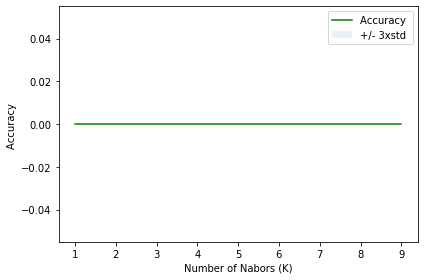

In [52]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

In [53]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.0 with k= 1
